In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import argparse
import seaborn.apionly as sns

from icecube import ShowerLLH

from composition.analysis.load_sim import load_sim
import composition.analysis.data_functions as datafunc
import composition.analysis.plotting_functions as plotting

In [20]:
sns.set_palette('muted')
sns.set_color_codes()

In [21]:
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'max_charge_frac', 'reco_containment',
                     'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

print('n_events before cuts = {}'.format(len(df)))
df = df[selection_mask]
print('n_events after cuts = {}'.format(len(df)))

n_events before cuts = 883119
n_events after cuts = 103778


In [22]:
MC_log_energy = df.MC_log_energy
reco_log_energy = df.reco_log_energy

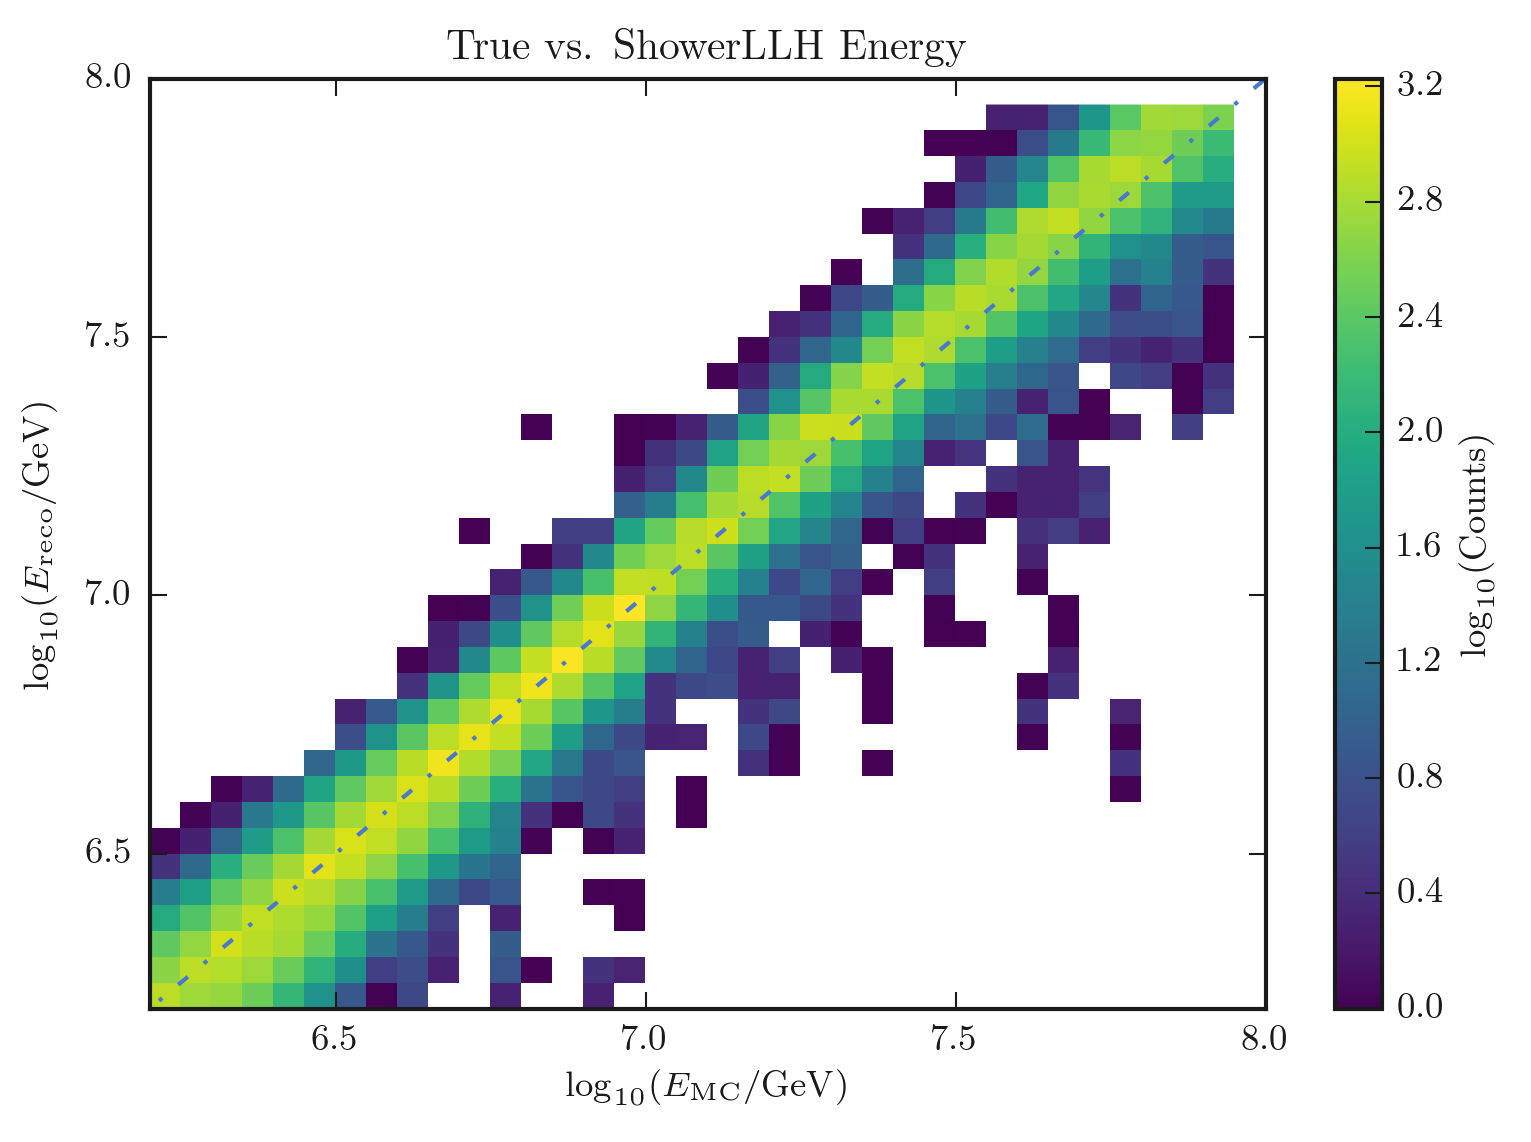

In [23]:
energy_bins = np.arange(6.2, 8, 0.05)
fig, ax = plt.subplots()
plotting.histogram_2D(MC_log_energy, reco_log_energy, energy_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.xlim([6.2, 8])
plt.ylim([6.2, 8])
plt.xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
plt.ylabel('$\log_{10}(E_{\mathrm{reco}}/\mathrm{GeV})$')
plt.title('True vs. ShowerLLH Energy')
plt.show()

In [24]:
energy_res = reco_log_energy - MC_log_energy
energy_bins = np.linspace(6.2, 8, 30)
bin_centers, bin_medians, error = datafunc.get_medians(MC_log_energy, energy_res, energy_bins)

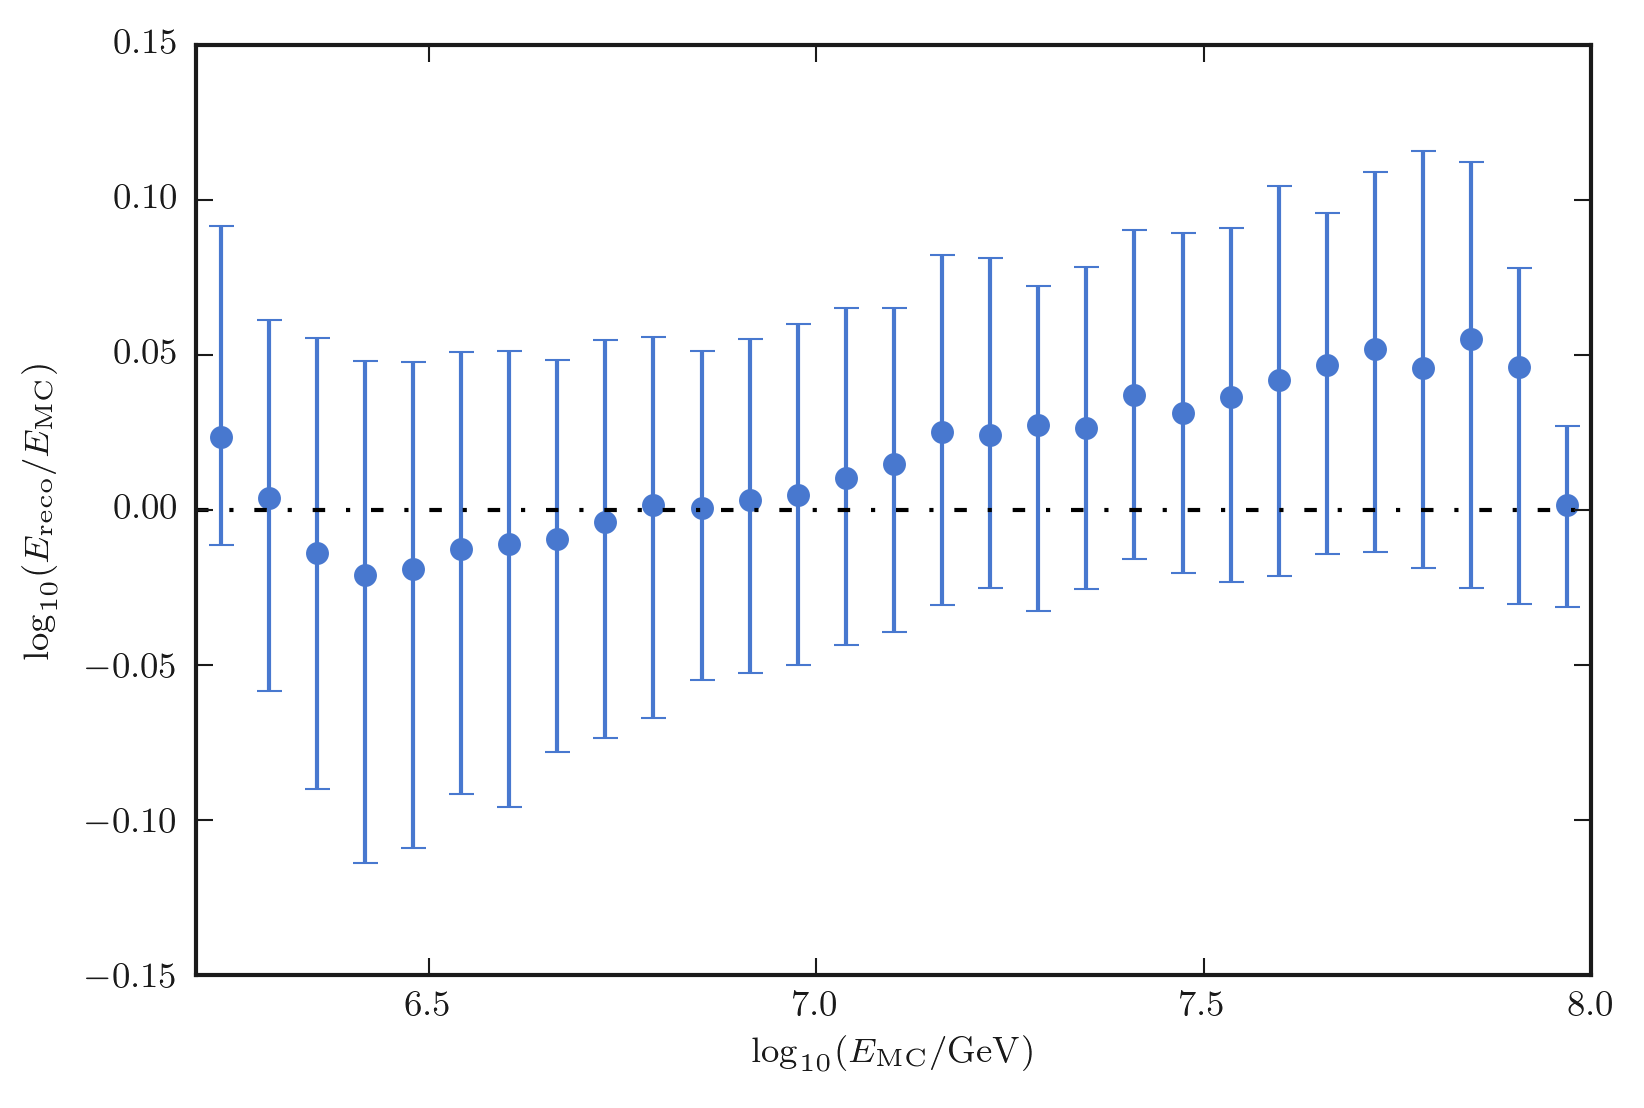

In [25]:
fig, ax = plt.subplots()
ax.errorbar(bin_centers, bin_medians, yerr=error, marker='.')
ax.axhline(0, marker='None', linestyle='-.')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\log_{10}(E_{\mathrm{reco}}/E_{\mathrm{MC}})$')
plt.show()

In [26]:
MC_x = df.MC_x
MC_y = df.MC_y
reco_x = df.reco_x
reco_y = df.reco_y
lap_x = df.lap_x
lap_y = df.lap_y

In [27]:
core_res = np.sqrt((reco_x - MC_x)**2+(reco_y - MC_y)**2)
lap_core_res = np.sqrt((lap_x - MC_x)**2+(lap_y - MC_y)**2)
bin_centers, reco_bin_medians, reco_error = datafunc.get_medians(MC_log_energy, core_res, energy_bins)
bin_centers, lap_bin_medians, lap_error = datafunc.get_medians(MC_log_energy, lap_core_res, energy_bins)

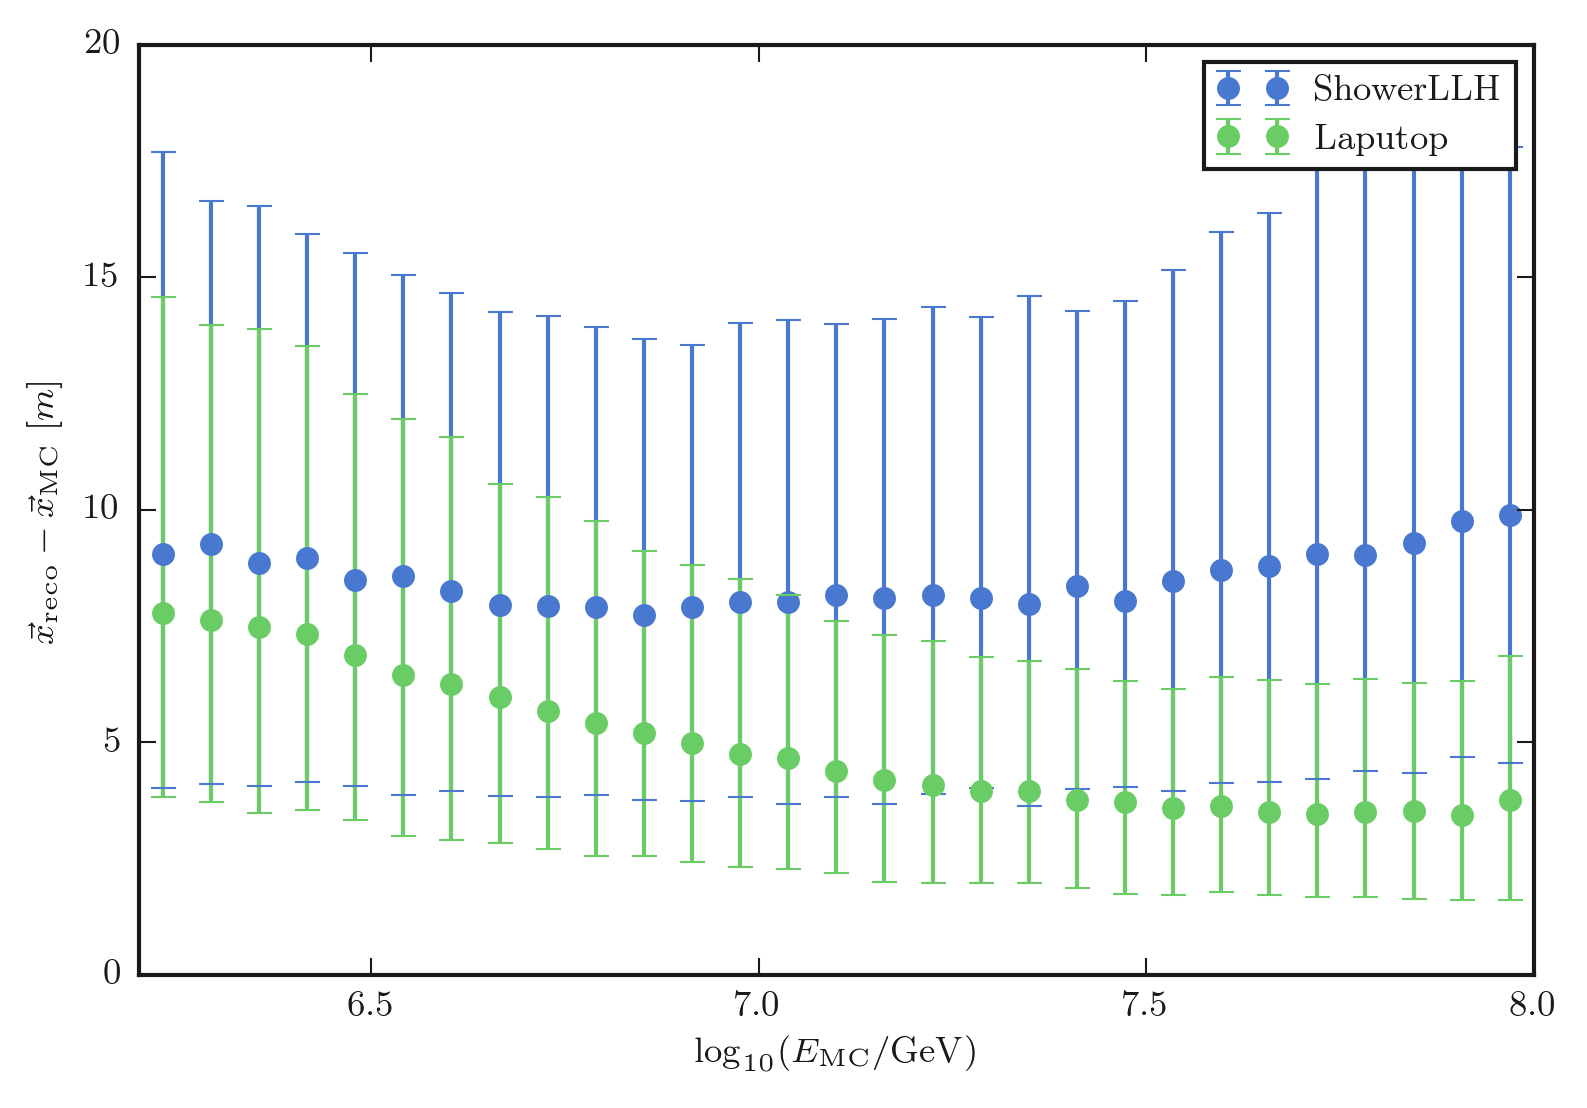

In [28]:
fig, ax = plt.subplots()
ax.errorbar(bin_centers, reco_bin_medians, yerr=reco_error, marker='.', label='ShowerLLH')
ax.errorbar(bin_centers, lap_bin_medians, yerr=lap_error, marker='.', label='Laputop')
ax.set_xlabel('$\log_{10}(E_{\mathrm{MC}}/\mathrm{GeV})$')
ax.set_ylabel('$\\vec{x}_{\mathrm{reco}}-\\vec{x}_{\mathrm{MC}} \ [m]$')
plt.legend()
plt.show()

In [34]:
reco_core_pos = np.sqrt(MC_x**2+MC_y**2)
pos_bins = np.linspace(0, 800, 30)
bin_centers, bin_medians, error = datafunc.get_medians(core_pos, energy_res, pos_bins)

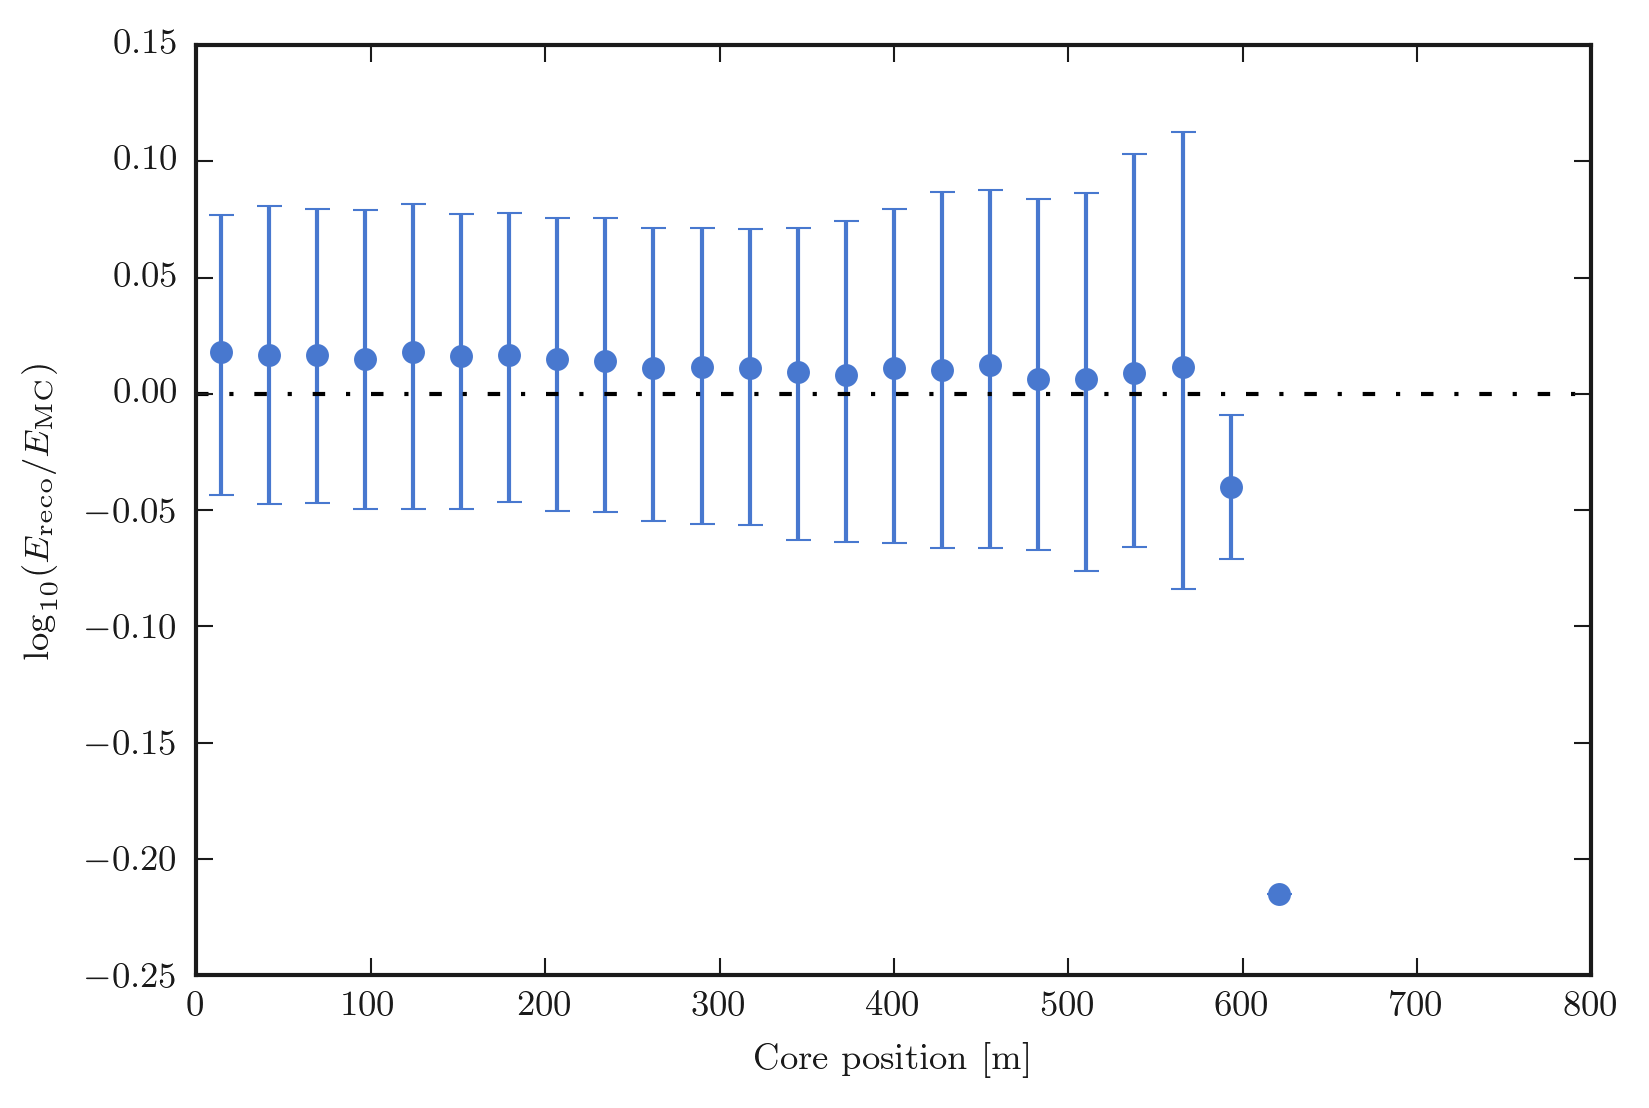

In [35]:
fig, ax = plt.subplots()
ax.errorbar(bin_centers, bin_medians, yerr=error, marker='.')
ax.axhline(0, marker='None', linestyle='-.')
ax.set_xlabel('Core position [m]')
ax.set_ylabel('$\log_{10}(E_{\mathrm{reco}}/E_{\mathrm{MC}})$')
plt.show()

In [31]:
LLH_grid = ShowerLLH.LLHGrid('7006')
tank_xy = LLH_grid.tank_xy
tank_x, tank_y = np.transpose(tank_xy)

Loading /data/ana/CosmicRay/IceTop_level3/sim/IC79/GCD/Level3_7006_GCD.i3.gz...


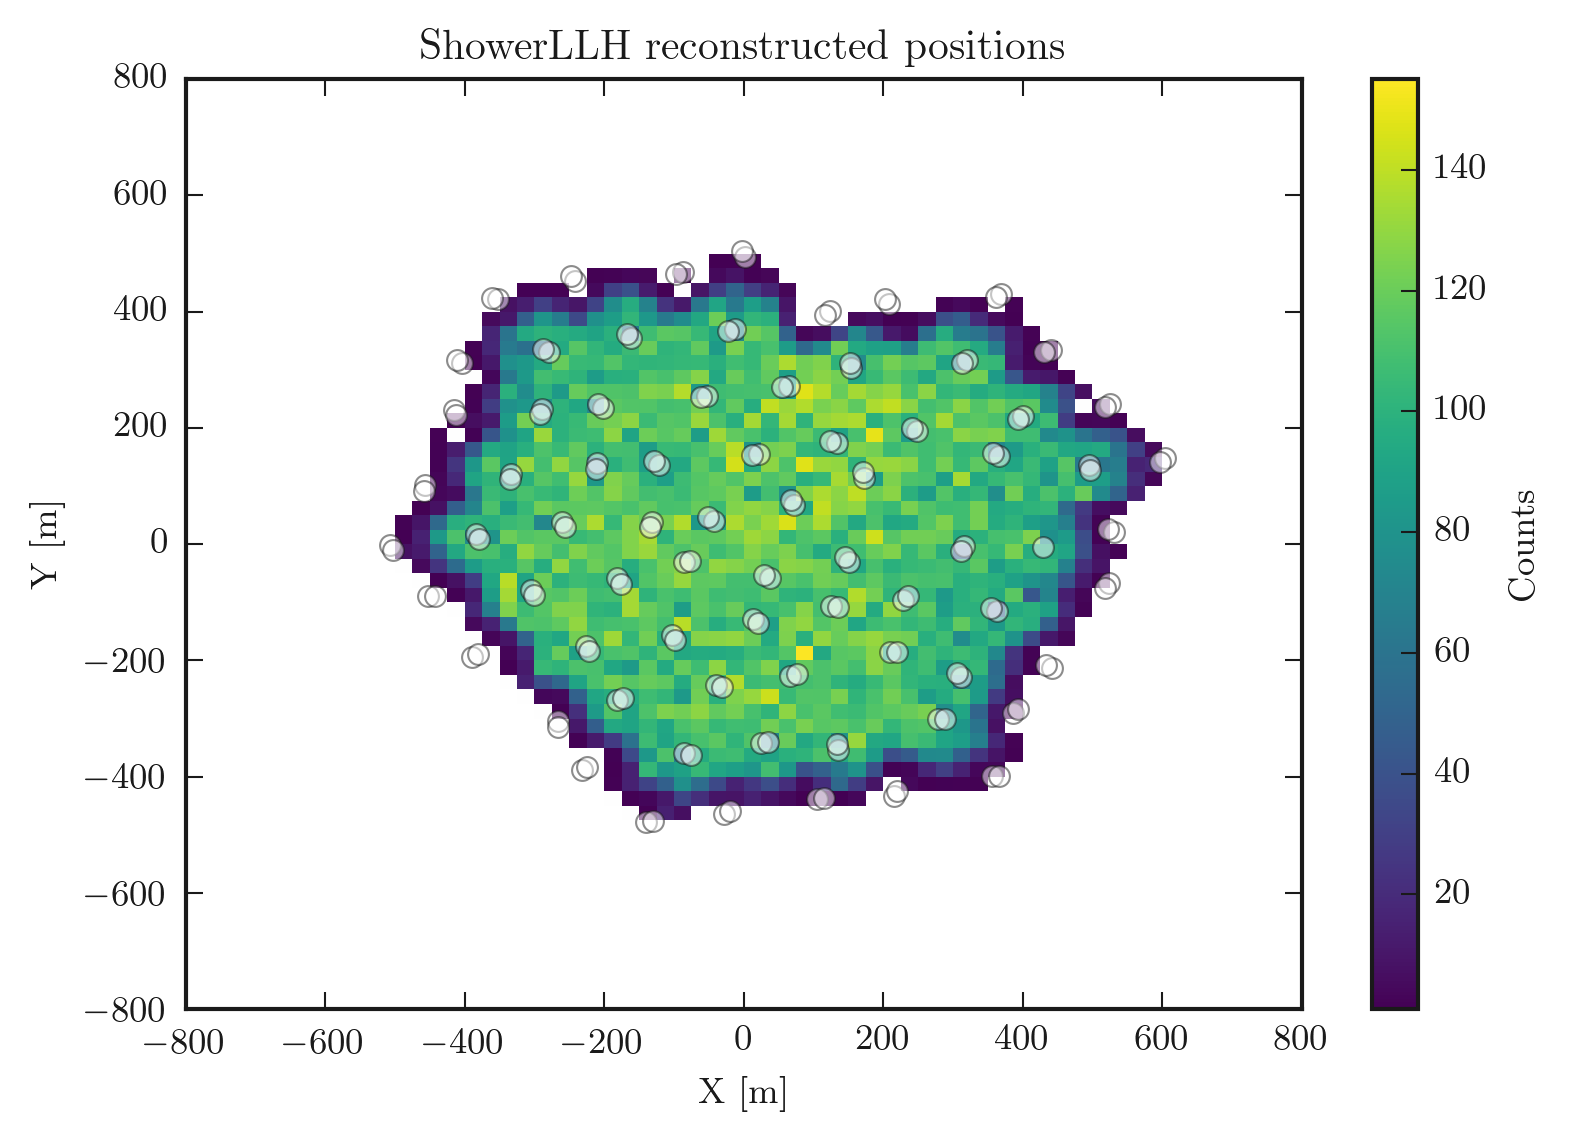

In [32]:
dist_bins = np.arange(-1700, 1700, 25)
fig, ax = plt.subplots()
plotting.histogram_2D(reco_x, reco_y, dist_bins)
ax.plot(tank_x, tank_y, marker='o', markersize=5,
        color='white', alpha=0.5)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('ShowerLLH reconstructed positions')
ax.set_xlim([-800,800])
ax.set_ylim([-800,800])
plt.show()

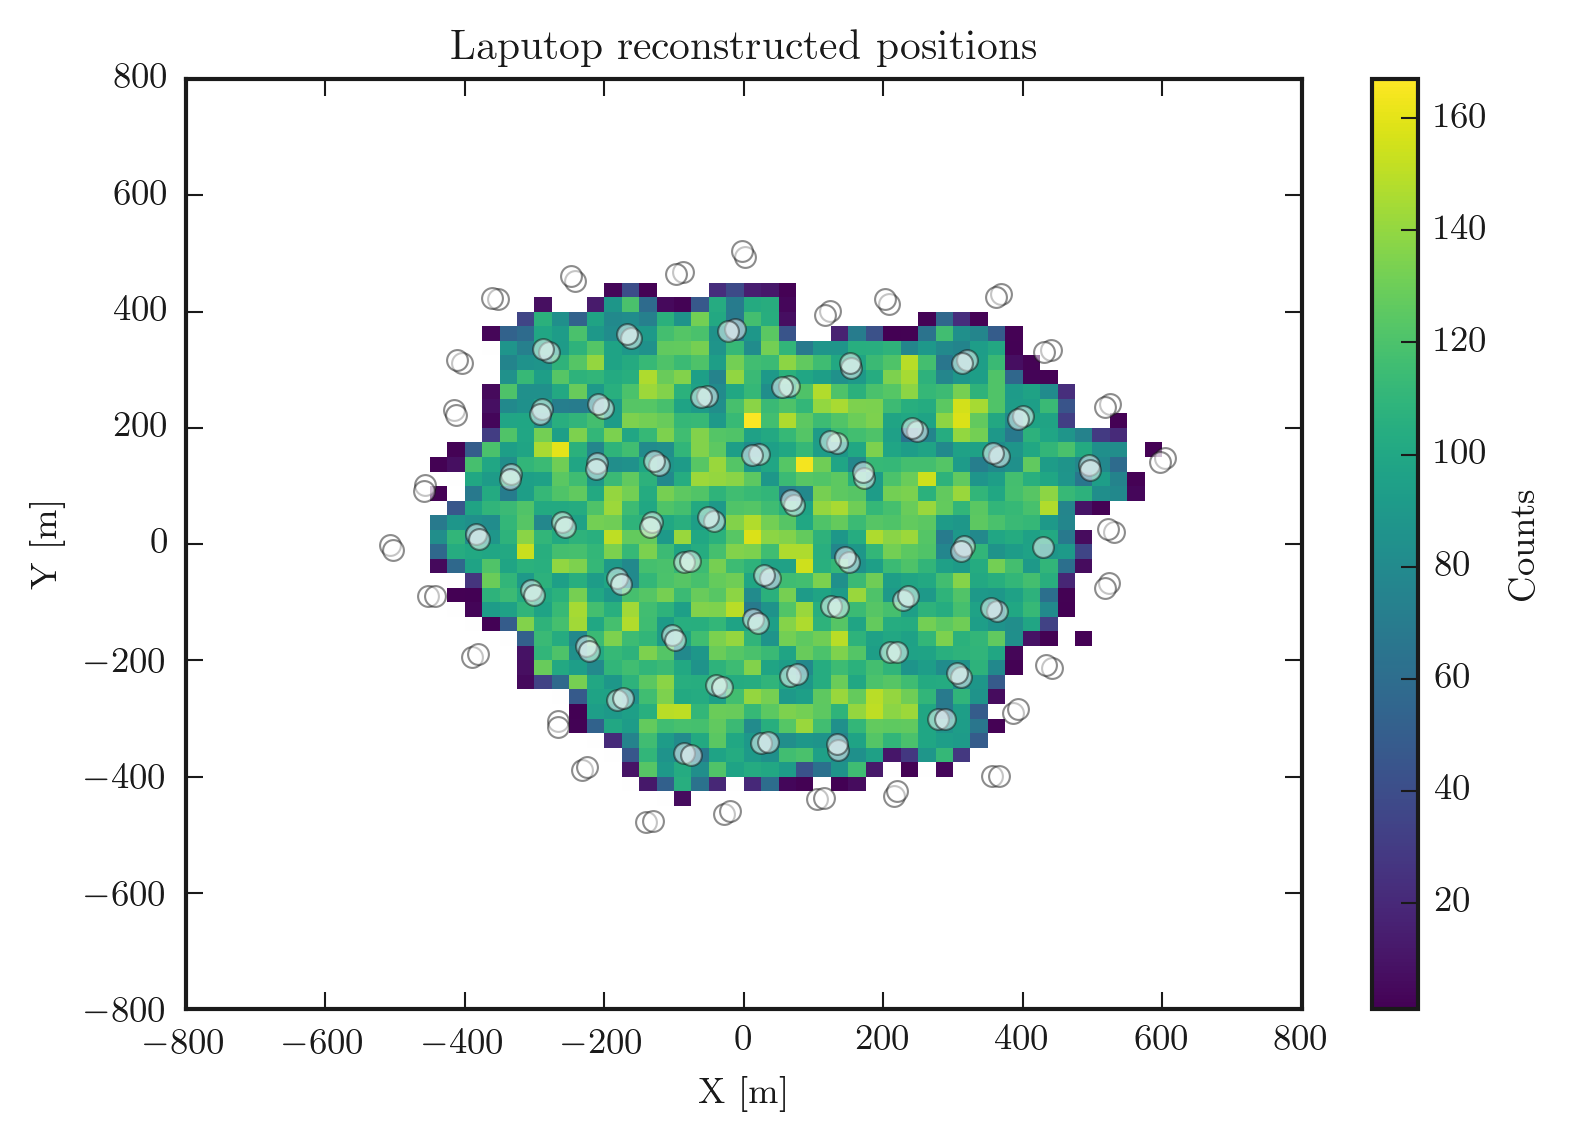

In [33]:
fig, ax = plt.subplots()
plotting.histogram_2D(lap_x, lap_y, dist_bins)
ax.plot(tank_x, tank_y, marker='o', markersize=5,
        color='white', alpha=0.5)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Laputop reconstructed positions')
ax.set_xlim([-800,800])
ax.set_ylim([-800,800])
plt.show()